In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('Test_Sales_LinReg.csv')

# Check for missing values and remove rows with missing data
data = data.dropna()

# Split the data into features (X) and target variable (y)
X = data[['Republic', 'NDTV', 'TV5', 'TV9', 'AajTak']]
y = data['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Print the coefficients and intercept
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model.intercept_)

Mean Squared Error: 2.518379389690121
R-squared Score: 0.8981358599786616
Republic: 0.045739572551101296
NDTV: 0.16068647069969216
TV5: 0.003759571434851325
TV9: 0.0048312178844613606
AajTak: 0.024508239278641774
Intercept: 2.6487356021191335


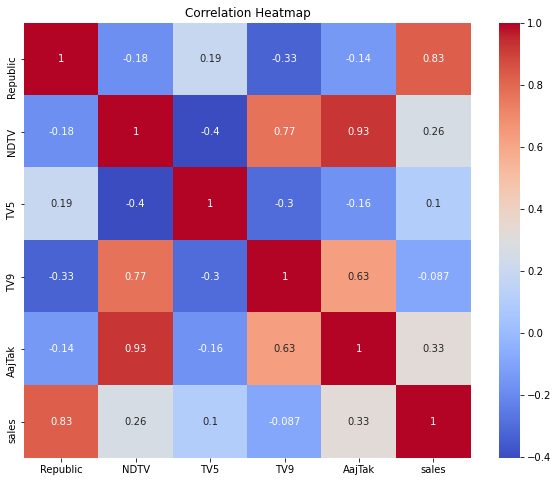

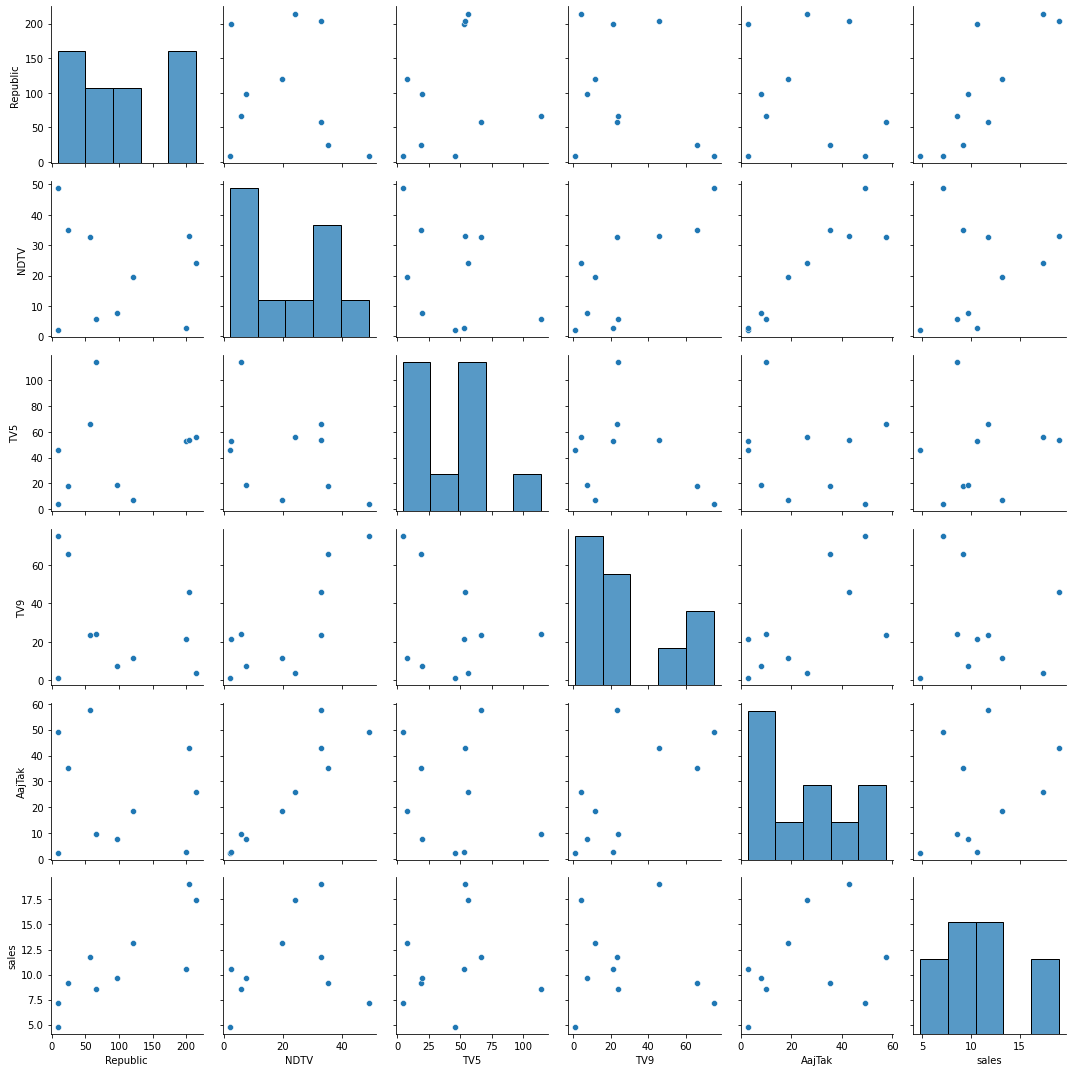

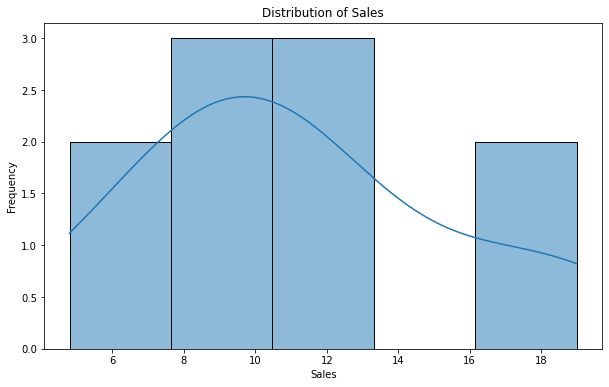

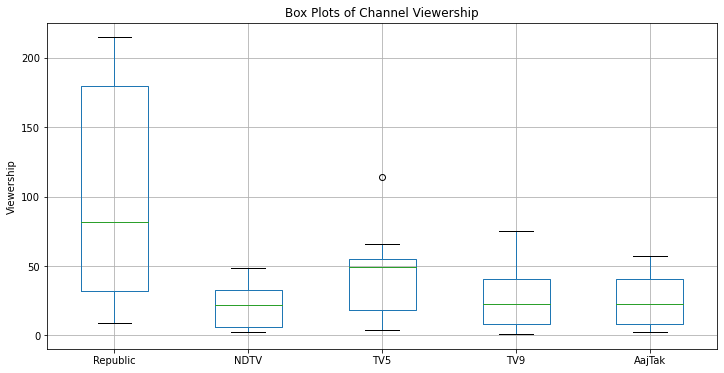

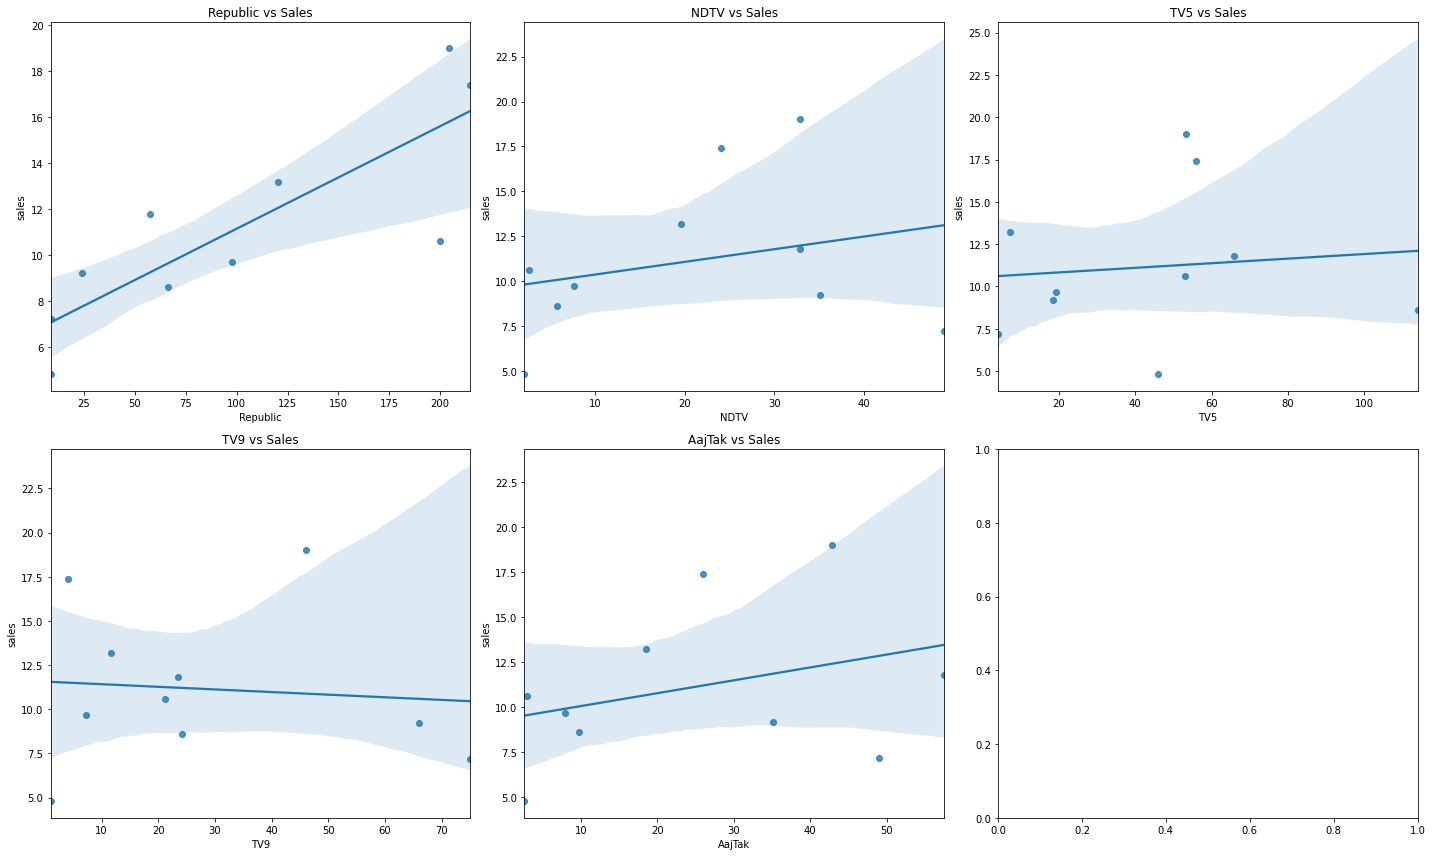

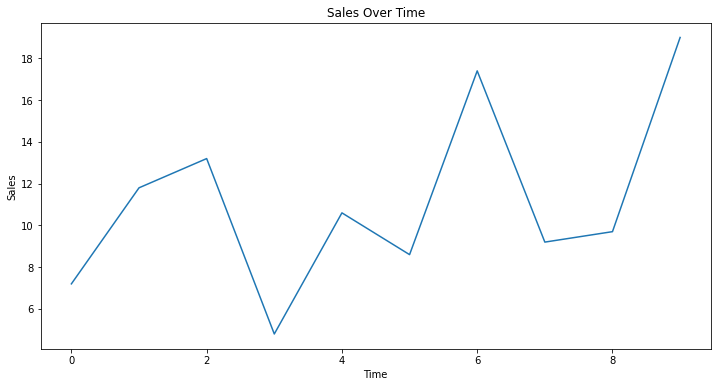

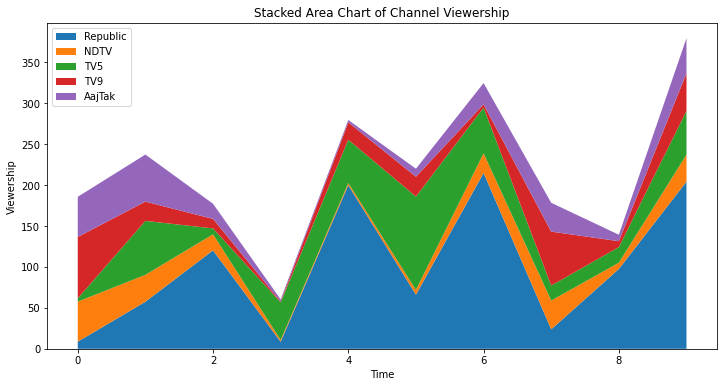

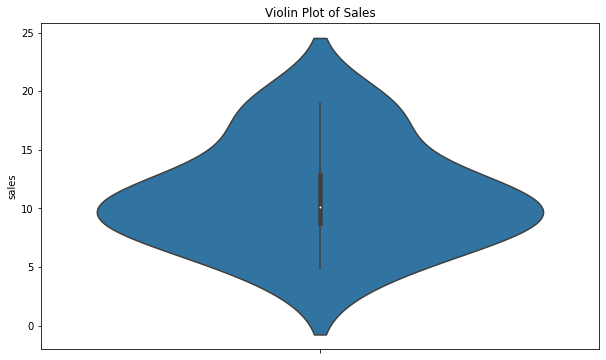

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Your data string goes here (I'm using a truncated version for brevity)
data_string = """Republic,NDTV,TV5,TV9,AajTak,sales
8.7,48.9,4,75,49,7.2
57.5,32.8,65.9,23.5,57.5,11.8
120.2,19.6,7.2,11.6,18.5,13.2
8.6,2.1,46,1,2.6,4.8
199.8,2.6,52.9,21.2,2.9,10.6
66.1,5.8,114,24.2,9.8,8.6
214.7,24,55.8,4,26,17.4
23.8,35.1,18.3,65.9,35.19,9.2
97.5,7.6,19.1,7.2,7.9,9.7
204.1,32.9,53.4,46,42.9,19"""

# Create DataFrame
data = pd.read_csv(StringIO(data_string))

# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2. Pairplot
sns.pairplot(data, height=2.5)
plt.tight_layout()
plt.show()

# 3. Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# 4. Box Plots for each channel
plt.figure(figsize=(12, 6))
data.boxplot(column=['Republic', 'NDTV', 'TV5', 'TV9', 'AajTak'])
plt.title('Box Plots of Channel Viewership')
plt.ylabel('Viewership')
plt.show()

# 5. Scatter plots with regression line for each channel vs sales
channels = ['Republic', 'NDTV', 'TV5', 'TV9', 'AajTak']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, channel in enumerate(channels):
    sns.regplot(x=channel, y='sales', data=data, ax=axes[i])
    axes[i].set_title(f'{channel} vs Sales')

plt.tight_layout()
plt.show()

# 6. Time Series Plot (assuming the data is time-ordered)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['sales'])
plt.title('Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

# 7. Stacked Area Chart
plt.figure(figsize=(12, 6))
plt.stackplot(data.index, data['Republic'], data['NDTV'], data['TV5'], data['TV9'], data['AajTak'],
              labels=['Republic', 'NDTV', 'TV5', 'TV9', 'AajTak'])
plt.title('Stacked Area Chart of Channel Viewership')
plt.xlabel('Time')
plt.ylabel('Viewership')
plt.legend(loc='upper left')
plt.show()

# 8. Violin Plot for Sales
plt.figure(figsize=(10, 6))
sns.violinplot(y='sales', data=data)
plt.title('Violin Plot of Sales')
plt.show()